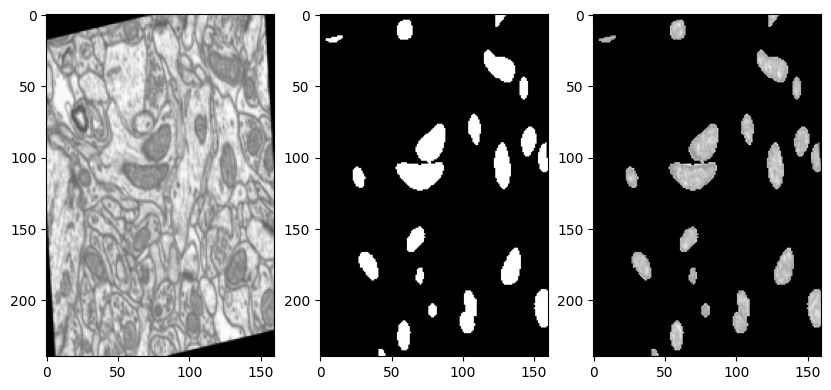

In [ ]:
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as T
import numpy as np
from unet.dataset import LucchiDataset
from typing import cast
from unet.utils import CombinedTransform

DATASET_ROOT = "./data/Lucchi++/"
TARGET_SIZE = (960 // 4, 640 // 4)

additional_transform = T.Compose([T.Resize(TARGET_SIZE), T.ToTensor()])

train_transform = CombinedTransform(
    rotation_degrees=15.0,
    img_additional_transform=additional_transform,
    mask_additional_transform=additional_transform,
)
test_transform = CombinedTransform(
    rotation_degrees=0,
    h_flip_prob=0,
    v_flip_prob=0,
    img_additional_transform=additional_transform,
    mask_additional_transform=additional_transform,
)

train_dataset = LucchiDataset(
    root=DATASET_ROOT, split="train", combined_transform=train_transform
)
test_dataset = LucchiDataset(
    root=DATASET_ROOT, split="test", combined_transform=test_transform
)


img, mask = train_dataset.__getitem__(2)
img, mask = cast(torch.Tensor, img), cast(torch.Tensor, mask)

_, axes = plt.subplots(1, 3, figsize=(10, 15))

img_display = img.squeeze(0).numpy()
mask_display = mask.squeeze(0).numpy()

axes[0].imshow(img_display, cmap="grey")
axes[1].imshow(mask_display, cmap="grey")
axes[2].imshow(img_display * mask_display, cmap="grey")

plt.show()
